### Target:
    
    - Getting a working modular setup. We will use assignment 5 code.

    - Model.py has models and utils.py has train, test and plotting functions.

### Results:

    - Model has 5.9M parameters.

    - Train Accuracy = 99.91

    - Test Accuracy = 99.39

### Analysis:

    - Our setup is running correctly.

    - Model is very large and overfitting

    - Closer look at images tell us that a receptive field of 5 pixels is enough to catch edges.

In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device Selected:", device)

Device Selected: mps


In [3]:
SEED = 42
torch.manual_seed(SEED)

if device == 'cuda':
    torch.cuda.manual_seed(SEED)

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [6]:
batch_size = 32

kwargs = {'batch_size': batch_size, 'num_workers': 4, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)

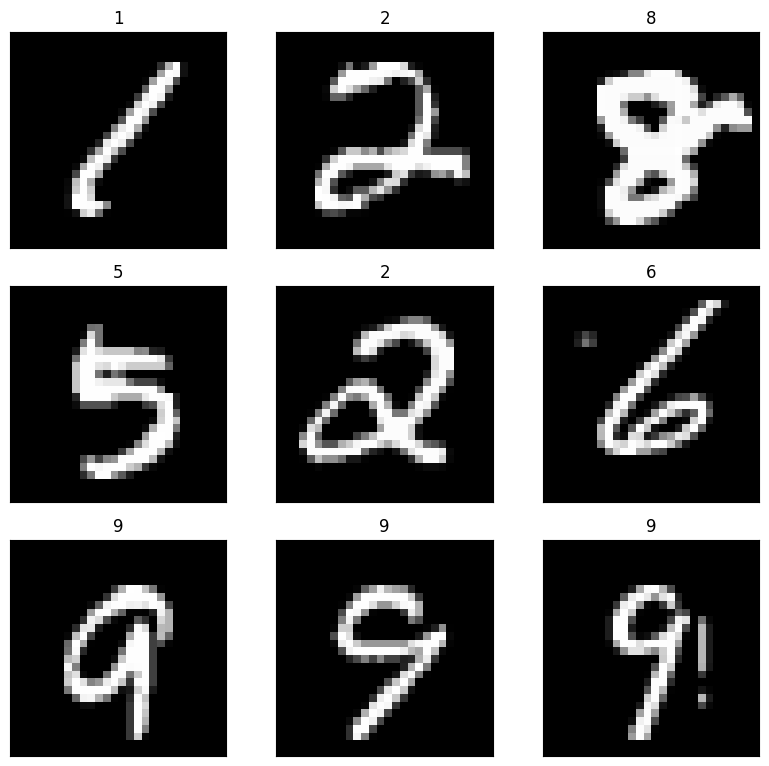

In [7]:
from utils import show_examples
show_examples(train_loader, figsize=(8, 8))

In [8]:
from model import Model1 as Net

model = Net()
model.summary(input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model1                                   [32, 1, 28, 28]           [32, 10]                  --                             --
├─Conv2d: 1-1                            [32, 1, 28, 28]           [32, 32, 26, 26]          320                         0.05%
├─Conv2d: 1-2                            [32, 32, 26, 26]          [32, 64, 24, 24]          18,496                      3.12%
├─Conv2d: 1-3                            [32, 64, 12, 12]          [32, 128, 10, 10]         73,856                     12.45%
├─Conv2d: 1-4                            [32, 128, 10, 10]         [32, 256, 8, 8]           295,168                    49.76%
├─Linear: 1-5                            [32, 4096]                [32, 50]                  204,850                    34.53%
├─Linear: 1-6                            [32, 50]                  [32, 10]                  510               

In [9]:
from utils import train, test

In [10]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


  0%|          | 0/1875 [00:00<?, ?it/s]

Train: Batch Loss=0.0220 Batch_id=1874 Average Loss=0.1698 Accuracy=94.48: 100%|██████████| 1875/1875 [00:50<00:00, 37.20it/s]


Test set: Average loss: 0.0463, Accuracy: 9861/10000 (98.61%)

Epoch 2


Train: Batch Loss=0.0340 Batch_id=1874 Average Loss=0.0395 Accuracy=98.82: 100%|██████████| 1875/1875 [00:51<00:00, 36.47it/s]


Test set: Average loss: 0.0400, Accuracy: 9867/10000 (98.67%)

Epoch 3


Train: Batch Loss=0.0081 Batch_id=1874 Average Loss=0.0274 Accuracy=99.12: 100%|██████████| 1875/1875 [00:52<00:00, 35.58it/s]


Test set: Average loss: 0.0256, Accuracy: 9926/10000 (99.26%)

Epoch 4


Train: Batch Loss=0.0092 Batch_id=1874 Average Loss=0.0184 Accuracy=99.43: 100%|██████████| 1875/1875 [00:50<00:00, 37.39it/s]


Test set: Average loss: 0.0275, Accuracy: 9906/10000 (99.06%)

Epoch 5


Train: Batch Loss=0.0017 Batch_id=1874 Average Loss=0.0137 Accuracy=99.56: 100%|██████████| 1875/1875 [00:49<00:00, 37.89it/s]


Test set: Average loss: 0.0210, Accuracy: 9942/10000 (99.42%)

Epoch 6


Train: Batch Loss=0.0003 Batch_id=1874 Average Loss=0.0097 Accuracy=99.70: 100%|██████████| 1875/1875 [00:50<00:00, 37.37it/s]


Test set: Average loss: 0.0304, Accuracy: 9915/10000 (99.15%)

Epoch 7


Train: Batch Loss=0.0074 Batch_id=1874 Average Loss=0.0076 Accuracy=99.78: 100%|██████████| 1875/1875 [01:00<00:00, 31.09it/s]


Test set: Average loss: 0.0301, Accuracy: 9917/10000 (99.17%)

Epoch 8


Train: Batch Loss=0.0151 Batch_id=1874 Average Loss=0.0069 Accuracy=99.77: 100%|██████████| 1875/1875 [00:59<00:00, 31.48it/s]


Test set: Average loss: 0.0252, Accuracy: 9933/10000 (99.33%)

Epoch 9


Train: Batch Loss=0.0007 Batch_id=1874 Average Loss=0.0044 Accuracy=99.86: 100%|██████████| 1875/1875 [00:53<00:00, 34.96it/s]


Test set: Average loss: 0.0327, Accuracy: 9926/10000 (99.26%)

Epoch 10


Train: Batch Loss=0.0103 Batch_id=1874 Average Loss=0.0049 Accuracy=99.85: 100%|██████████| 1875/1875 [00:50<00:00, 37.30it/s]


Test set: Average loss: 0.0296, Accuracy: 9938/10000 (99.38%)

Epoch 11


Train: Batch Loss=0.0003 Batch_id=1874 Average Loss=0.0050 Accuracy=99.84: 100%|██████████| 1875/1875 [00:48<00:00, 38.59it/s]


Test set: Average loss: 0.0305, Accuracy: 9915/10000 (99.15%)

Epoch 12


Train: Batch Loss=0.0001 Batch_id=1874 Average Loss=0.0041 Accuracy=99.87: 100%|██████████| 1875/1875 [00:48<00:00, 38.60it/s]


Test set: Average loss: 0.0291, Accuracy: 9934/10000 (99.34%)

Epoch 13


Train: Batch Loss=0.0069 Batch_id=1874 Average Loss=0.0043 Accuracy=99.85: 100%|██████████| 1875/1875 [00:49<00:00, 38.01it/s]


Test set: Average loss: 0.0297, Accuracy: 9927/10000 (99.27%)

Epoch 14


Train: Batch Loss=0.0001 Batch_id=1874 Average Loss=0.0036 Accuracy=99.88: 100%|██████████| 1875/1875 [00:49<00:00, 37.65it/s]


Test set: Average loss: 0.0271, Accuracy: 9939/10000 (99.39%)

Epoch 15


Train: Batch Loss=0.0002 Batch_id=1874 Average Loss=0.0033 Accuracy=99.91: 100%|██████████| 1875/1875 [00:48<00:00, 38.32it/s]


Test set: Average loss: 0.0301, Accuracy: 9934/10000 (99.34%)



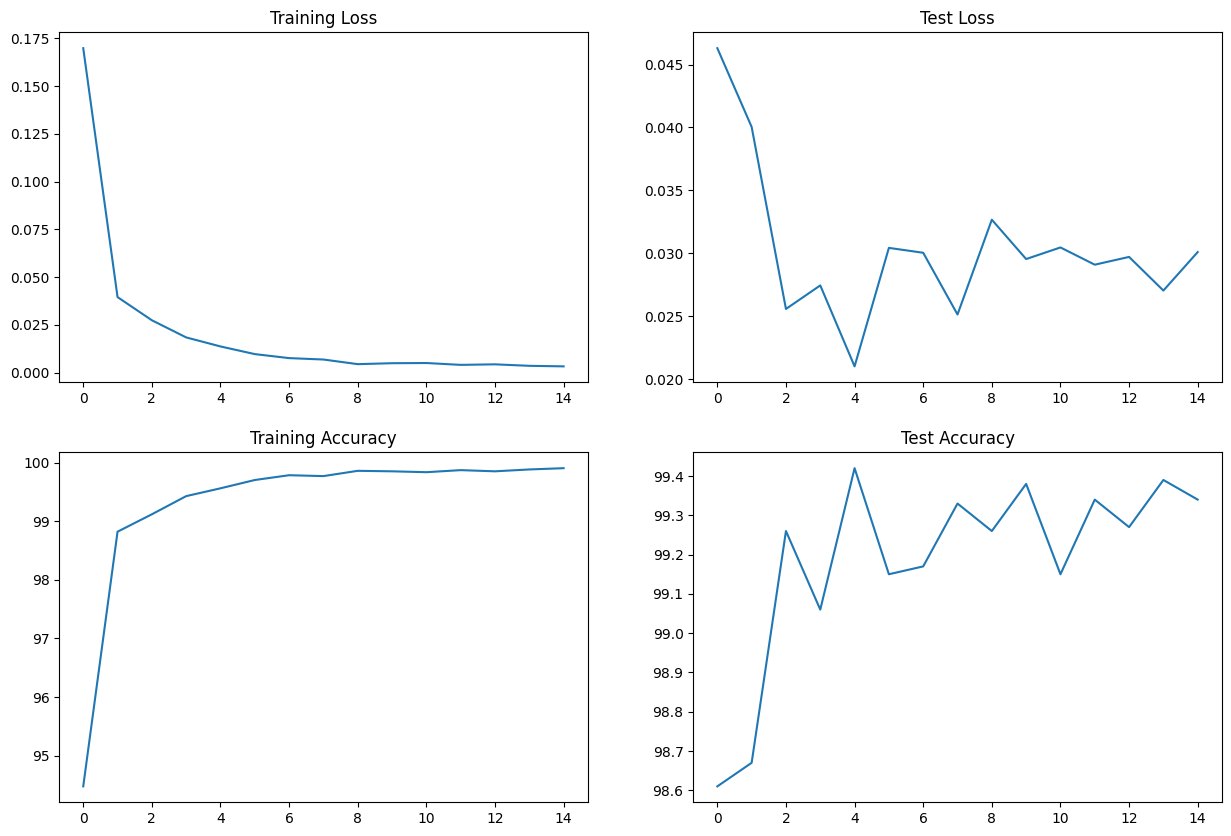

In [13]:
from utils import plot_stats
plot_stats()

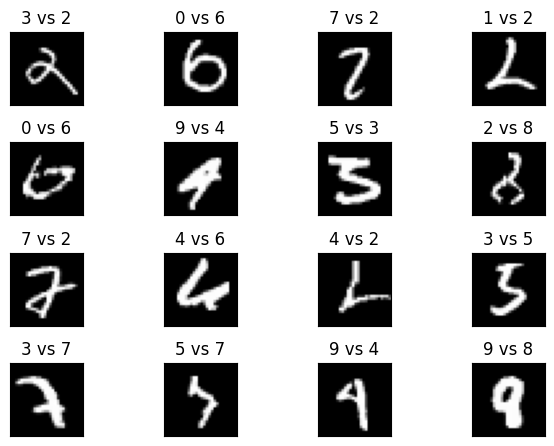

In [14]:
from utils import show_incorrect
show_incorrect() # Predicted vs Actual